In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import ROOT

from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)


Welcome to JupyROOT 6.08/06


In [2]:
Data = pd.read_table('Distribution_QGSP_BIC_HP_Degrador_210.00MeV.txt',
                     header=None,index_col=None,
                     names=['Energy','Px','Py','Pz','Theta','Phi'])

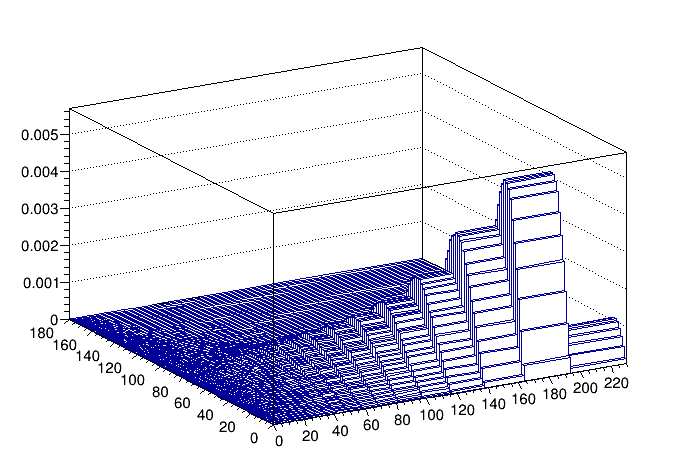

In [27]:
Energybin = np.logspace(-5,np.log10(230),100)
Anglebin = np.linspace(0,180,100)

data = Data[['Energy','Theta']]

# use a cpp funtion for filling histogram
histo2d = create_histogram_2d(data,Energybin,Anglebin)
c = ROOT.TCanvas("c")
ROOT.gStyle.SetPalette(1);
histo2d.Draw("LEGO")
c.Draw()



#string root_filename=histo_filename+".root";
#string eps_filename=histo_filename+".eps";
#c1->SaveAs(root_filename.c_str());
#c1->SaveAs(eps_filename.c_str());

 #vector<double> datax, vector<double> datay,TH2F &histo)

In [26]:
def create_histogram_2d(data, binx, biny):

    histo2d = ROOT.TH2F("h2","",len(binx)-1,binx,len(biny)-1,Anglebin)
    name_x = data.columns[0]
    name_y = data.columns[1]
    for index,line in data.iterrows():
        x=line.values[0]
        y=line.values[1]
        histo2d.Fill(x,y)
    
    #Scale the histogramdd
    
    scale_histo = 1/(histo2d.Integral())
    histo2d.Scale(scale_histo)
    
    return histo2d